<a href="https://colab.research.google.com/github/ajitjadhav10/UMBC/blob/main/DATA%20690%20NLP/DATA_690_NLP_HW_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the imdb-reviews_2.csv file.
- Load the data
- Count the number of positive and negative sentiment
- Clean the text ‘review’ and create a column called ‘review_processed’
- Replace short words as
df['review_processed'] = df['review_processed'].apply(lambda x:
' '.join([w for w in x.split() if len(w)>2]))
- Make entire text lowercase
- Remove stopwords
- Make custom list of words to be removed including ‘movie’, ‘film’, ‘one’, ‘make’,
and ‘even’
- Add to the list of words
- Lemmatize the text
- Convert NLTK tags into ‘wordnet’ tags
- Find the part of speech tag
- Lemmatize sentences using POS. Tokenize the sentence and find POS tag for
each token
- Define ‘wordnet_tagged.’ If there is no available tag, append the token as is.
Else, use the tag to lemmatize the token
- Plot the most frequent words from positive reviews using bar chart. Subset
positive review dataset, extract words into list and count frequency. Subset top
30 words by frequency in a horizontal bar chart
- Create a word cloud
- Import CountVectorizer and create a sparse matrix of 2,500 tokens. Split the data
set into train and test (20%) set
- Use the GaussianNB to train the model on the training data. Provide the
accuracy of the model
- Test the model on the test set
- Create the confusion matrix and classification report
- Use Seaborn heatmap to show TP, FP, TN, FN values
- Use a logistic regression model and check the accuracy of the model for C=0.01, 0.05, 0.5, 0.5, and 1.
- Provide the ROC curve. What is the area under the curve?

In [128]:
import pandas as pd

In [129]:
df=pd.read_csv('https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20690%20NLP/Data%20files/imdb-reviews_2.csv')
df.head()

,review,label
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1


In [130]:
df['sentiment']=['Positive' if x==1 else 'Negative' for x in df['label']]

In [131]:
df.head()

,review,label,sentiment
0,"first think another Disney movie, might good, ...",1,Positive
1,"Put aside Dr. House repeat missed, Desperate H...",0,Negative
2,"big fan Stephen King's work, film made even gr...",1,Positive
3,watched horrid thing TV. Needless say one movi...,0,Negative
4,truly enjoyed film. acting terrific plot. Jeff...,1,Positive


In [132]:
df['sentiment'].value_counts()

Positive    2528
Negative    2472
Name: sentiment, dtype: int64

In [133]:
# Replacing punctuations with space
df['review_processed'] = df['review'].str.replace("[^a-zA-Z#]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [134]:
df.head()

,review,label,sentiment,review_processed
0,"first think another Disney movie, might good, ...",1,Positive,first think another Disney movie might good ...
1,"Put aside Dr. House repeat missed, Desperate H...",0,Negative,Put aside Dr House repeat missed Desperate H...
2,"big fan Stephen King's work, film made even gr...",1,Positive,big fan Stephen King s work film made even gr...
3,watched horrid thing TV. Needless say one movi...,0,Negative,watched horrid thing TV Needless say one movi...
4,truly enjoyed film. acting terrific plot. Jeff...,1,Positive,truly enjoyed film acting terrific plot Jeff...


In [135]:
df['review_processed'] = df['review_processed'].apply(lambda x:' '.join([w for w in x.split() if len(w)>2]))

In [136]:
df.head()

,review,label,sentiment,review_processed
0,"first think another Disney movie, might good, ...",1,Positive,first think another Disney movie might good ki...
1,"Put aside Dr. House repeat missed, Desperate H...",0,Negative,Put aside House repeat missed Desperate Housew...
2,"big fan Stephen King's work, film made even gr...",1,Positive,big fan Stephen King work film made even great...
3,watched horrid thing TV. Needless say one movi...,0,Negative,watched horrid thing Needless say one movies w...
4,truly enjoyed film. acting terrific plot. Jeff...,1,Positive,truly enjoyed film acting terrific plot Jeff C...


In [137]:
df['review_processed']=[text.lower() for text in df['review_processed']]

In [138]:
df.head()

,review,label,sentiment,review_processed
0,"first think another Disney movie, might good, ...",1,Positive,first think another disney movie might good ki...
1,"Put aside Dr. House repeat missed, Desperate H...",0,Negative,put aside house repeat missed desperate housew...
2,"big fan Stephen King's work, film made even gr...",1,Positive,big fan stephen king work film made even great...
3,watched horrid thing TV. Needless say one movi...,0,Negative,watched horrid thing needless say one movies w...
4,truly enjoyed film. acting terrific plot. Jeff...,1,Positive,truly enjoyed film acting terrific plot jeff c...


In [139]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [140]:
new_list=['movie','film','one','make','even']

In [141]:
for word in new_list:
  stop_words.append(word)

In [142]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [143]:
# Function to remove stop words 
def removing_stopwords(revs):
    review_tokenized = word_tokenize(revs)
    reviews_1 = " ".join([i for i in review_tokenized  if i not in stop_words])
    return reviews_1

# Removing stopwords
df['review_processed'] = [removing_stopwords(r) for r in df['review_processed']]

In [144]:
df.head()

,review,label,sentiment,review_processed
0,"first think another Disney movie, might good, ...",1,Positive,first think another disney might good kids wat...
1,"Put aside Dr. House repeat missed, Desperate H...",0,Negative,put aside house repeat missed desperate housew...
2,"big fan Stephen King's work, film made even gr...",1,Positive,big fan stephen king work made greater fan kin...
3,watched horrid thing TV. Needless say one movi...,0,Negative,watched horrid thing needless say movies watch...
4,truly enjoyed film. acting terrific plot. Jeff...,1,Positive,truly enjoyed acting terrific plot jeff combs ...


In [145]:
#Begin Lemmatization 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once 

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [146]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [147]:
df.head()

,review,label,sentiment,review_processed
0,"first think another Disney movie, might good, ...",1,Positive,first think another disney might good kids wat...
1,"Put aside Dr. House repeat missed, Desperate H...",0,Negative,put aside house repeat missed desperate housew...
2,"big fan Stephen King's work, film made even gr...",1,Positive,big fan stephen king work made greater fan kin...
3,watched horrid thing TV. Needless say one movi...,0,Negative,watched horrid thing needless say movies watch...
4,truly enjoyed film. acting terrific plot. Jeff...,1,Positive,truly enjoyed acting terrific plot jeff combs ...


In [148]:
# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['review_processed'] = df['review_processed'].apply(lambda x: lemmatize_sentence(x))

In [149]:
df.head()

,review,label,sentiment,review_processed
0,"first think another Disney movie, might good, ...",1,Positive,first think another disney might good kid watc...
1,"Put aside Dr. House repeat missed, Desperate H...",0,Negative,put aside house repeat miss desperate housewif...
2,"big fan Stephen King's work, film made even gr...",1,Positive,big fan stephen king work make great fan king ...
3,watched horrid thing TV. Needless say one movi...,0,Negative,watch horrid thing needless say movie watch se...
4,truly enjoyed film. acting terrific plot. Jeff...,1,Positive,truly enjoyed act terrific plot jeff combs tal...


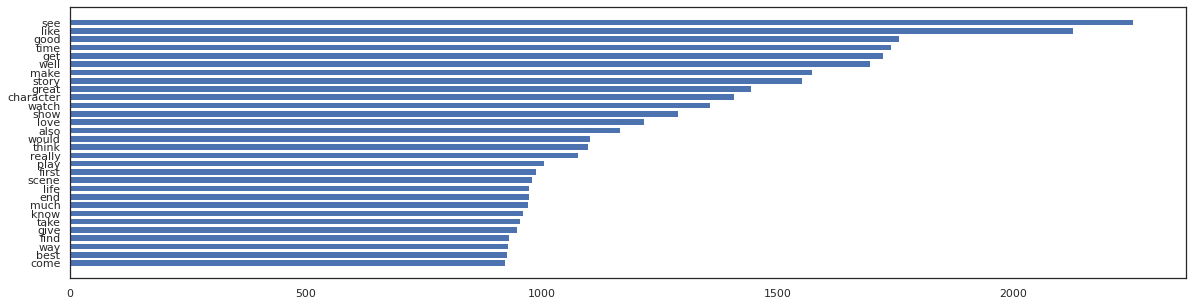

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist

# Subset positive review dataset
all_words_df = df[df['label'] == 1]

# Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df ['review_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
#ax.set(ylabel = 'Count')
plt.show()

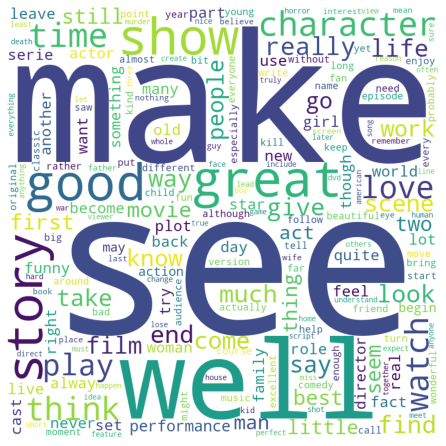

In [151]:
from wordcloud import WordCloud
word_cloud_df = df[df['label'] == 1]
all_words = ' '.join([text for text in word_cloud_df['review_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [152]:
from sklearn.feature_extraction.text import CountVectorizer

# Creating sparse matrix of top 2500 tokens
cv_model = CountVectorizer(max_features = 2500)
x = cv_model.fit_transform(df.review_processed).toarray()
y = df.label.values

# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20) #random_state = 42)

In [153]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

## Testing the model on test set
y_pred = classifier.predict(X_test)

In [154]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,

In [155]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[422  89]
 [208 281]]
The model accuracy is 0.703


In [156]:
import numpy as np

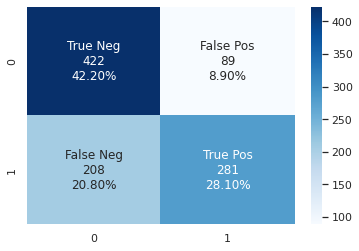

In [157]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [158]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [159]:
from sklearn.linear_model import LogisticRegression

In [160]:
#Logistic regression model for C=0.01

lr_1 = LogisticRegression(C = 0.01)
lr_1.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [161]:
y_pred_1 = lr_1.predict(X_test)
print("The accuracy score is:",accuracy_score(y_test, y_pred_1))

The accuracy score is: 0.837


In [162]:
#Logistic regression model for C=0.05

lr_2 = LogisticRegression(C = 0.05)
lr_2.fit(X_train, y_train)

LogisticRegression(C=0.05)

In [163]:
y_pred_2 = lr_2.predict(X_test)
print("The accuracy score is:",accuracy_score(y_test, y_pred_2))

The accuracy score is: 0.844


In [164]:
#Logistic regression model for C=0.5

lr_3 = LogisticRegression(C = 0.5)
lr_3.fit(X_train, y_train)

LogisticRegression(C=0.5)

In [165]:
y_pred_3 = lr_3.predict(X_test)
print("The accuracy score is:",accuracy_score(y_test, y_pred_3))

The accuracy score is: 0.836


In [166]:
#Logistic regression model for C=1

lr_4 = LogisticRegression(C = 1)
lr_4.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=1)

In [167]:
y_pred_4 = lr_4.predict(X_test)
print("The accuracy score is:",accuracy_score(y_test, y_pred_4))

The accuracy score is: 0.834


In [168]:
# roc curve for all models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_1, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred_2, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, y_pred_3, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, y_pred_4, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

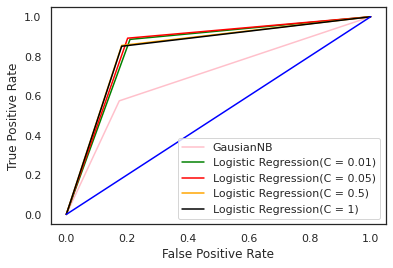

In [169]:
plt.plot(fpr1, tpr1,color='pink', label='GausianNB')
plt.plot(fpr2, tpr2,color='green', label='Logistic Regression(C = 0.01)')
plt.plot(fpr3, tpr3,color='red', label='Logistic Regression(C = 0.05)')
plt.plot(fpr4, tpr4,color='orange', label='Logistic Regression(C = 0.5)')
plt.plot(fpr5, tpr5,color='black', label='Logistic Regression(C = 1)')
plt.plot(p_fpr, p_tpr, color='blue')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

The Area Under the Curve (AUC), which serves as a summary of the ROC curve, is a measurement of a classifier's capacity to distinguish between classes. The performance of the model in differentiating between the positive and negative classes improves with increasing AUC.